<a href="https://colab.research.google.com/github/mkbahk/QuantumComputing/blob/main/QuantumToyAlgorithm_QuantumTeleportation_01_GoogleAIStudio_mkbahk_20250318.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%pip install qiskit[visualization]==1.2.4
%pip install qiskit-aer==0.15.1
%pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 56.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 67.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 5.7 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=174f783b9875a81efd7df2c6567a1401eefde3bc5d3bceda9ea368dd9ba0b87f
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 86.8 MB/s eta 0:00:00
  Cloning https://github.com/qis

In [3]:
%pip show qiskit
%pip show qiskit-aer

Name: qiskit
Version: 1.2.4
Summary: An open-source SDK for working with quantum computers at the level of extended quantum circuits, operators, and primitives.
Home-page: https://www.ibm.com/quantum/qiskit
Author: 
Author-email: Qiskit Development Team <qiskit@us.ibm.com>
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: dill, numpy, python-dateutil, rustworkx, scipy, stevedore, symengine, sympy, typing-extensions
Required-by: qiskit-aer, qiskit-textbook
Name: qiskit-aer
Version: 0.15.1
Summary: Aer - High performance simulators for Qiskit
Home-page: https://github.com/Qiskit/qiskit-aer
Author: AER Development Team
Author-email: qiskit@us.ibm.com
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: numpy, psutil, qiskit, scipy
Required-by: 


In [4]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile, assemble
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram, plot_state_city
from qiskit_textbook.tools import array_to_latex
from IPython.display import display, Math
import numpy as np
from numpy import pi
from qiskit.quantum_info import Statevector

# Quantum Teleportation: q[0]의 상태값을 q[1]에 복사시키는 것
## 왜, 양자역할이론에서 복사불가정리(no-cloning theorem)에 의하여 Qubit간에 복사가 되지 않는데, 복사는 하는 효과를 낼 수 있음.

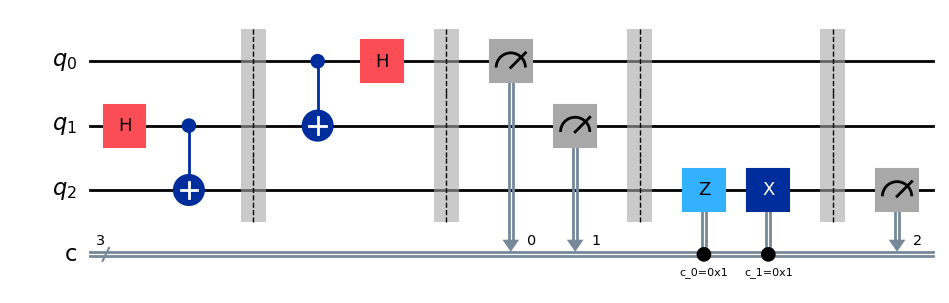

In [27]:
# 1. 큐비트 준비: Alice가 전송할 큐비트 (psi)와 얽힘 쌍 (q1, q2)
psi = Statevector([1/np.sqrt(2), 1j/np.sqrt(2)])  # 예시: |psi> = (1/sqrt(2))|0> + (i/sqrt(2))|1>

# 2. 양자 회로 생성
qc = QuantumCircuit(3, 3)  # 3 큐비트 (psi, q1, q2), 2 클래식 비트 (측정 결과 저장)

# 3. 얽힘 쌍 생성 (Bell state)
qc.h(1)  # Hadamard 게이트 적용
qc.cx(1, 2) # CNOT 게이트 적용 (제어: q1, 대상: q2)

# 4. 텔레포테이션 회로: Alice의 연산
qc.barrier()  # 시각적으로 분리
qc.cx(0, 1) # CNOT 게이트 적용 (제어: psi, 대상: q1)
qc.h(0)  # Hadamard 게이트 적용

# 5. 측정: Alice가 자신의 큐비트 (psi와 q1) 측정
qc.barrier()
qc.measure([0, 1], [0, 1])  # psi와 q1 측정 결과를 클래식 비트에 저장

# 6. Bob의 연산: Alice의 측정 결과에 따라 Bob의 큐비트 (q2)에 연산 적용
qc.barrier()
qc.z(2).c_if(0, 1)  # 측정 결과 (cbit_0)가 1이면 Pauli-Z 게이트 적용
qc.x(2).c_if(1, 1)  # 측정 결과 (cbit_1)가 1이면 Pauli-X 게이트 적용

# 7. 결과 확인: Bob의 큐비트 (q2) 상태 확인
qc.barrier()
qc.measure([2],[2])
qc.draw('mpl')  # 회로 시각화 (matplotlib 사용)


In [28]:
# 시뮬레이션
simulator = Aer.get_backend('statevector_simulator') # 'qasm_simulator' 대신 'statevector_simulator' 사용
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots =2048)
result = job.result()
output_state = result.get_statevector(qc, decimals=5) # decimals를 통해 출력 자릿수 조정
print(output_state)

Statevector([ 0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j,
             -0.+0.j],
            dims=(2, 2, 2))


In [29]:
# 이상적인 경우, 마지막 큐비트 (q2)의 상태는 원래 큐비트 (psi)의 상태와 같아야 합니다.
expected_state = psi
print(f"Expected State: {expected_state}")

Expected State: Statevector([0.70710678+0.j        , 0.        +0.70710678j],
            dims=(2,))


아니요, 일반적으로 위 두 Statevector는 직접적으로 비교하기 어렵습니다. 몇 가지 이유가 있습니다.

차원 (Dimension) 불일치:

첫 번째 Statevector는 dims=(2, 2, 2)로 주어져 있습니다. 이는 3개의 큐비트 시스템을 나타내는 8차원 벡터입니다.

두 번째 Statevector는 dims=(2,)로 주어져 있습니다. 이는 1개의 큐비트 시스템을 나타내는 2차원 벡터입니다.

차원이 다르므로, 두 벡터를 직접적으로 비교하는 것은 수학적으로 불가능합니다. 비교를 위해서는 차원을 맞추거나, 비교 가능한 형태로 변환해야 합니다.

물리적 의미 불일치:

첫 번째 벡터는 3 큐비트 시스템의 상태를 나타내고, 두 번째 벡터는 1 큐비트 시스템의 상태를 나타냅니다. 이들은 서로 다른 물리적 시스템을 나타내므로, 직접적인 비교는 의미가 없을 수 있습니다.

스칼라곱 (Inner product)를 통한 비교:

만약 두 벡터가 같은 물리적 시스템을 나타낸다면, 스칼라곱을 통해 유사성을 측정할 수 있습니다. 예를 들어, 두 벡터의 스칼라곱의 절대값이 1에 가까울수록 두 벡터는 유사하다고 볼 수 있습니다. 하지만 위 경우에는 차원이 다르므로 스칼라곱을 계산할 수 없습니다.

비교 가능하게 만드는 방법 (예시):

만약 두 벡터가 특정한 관계를 가지고 있다면, 비교 가능하게 만들 수 있습니다. 예를 들어, 다음과 같은 경우를 생각해 볼 수 있습니다.

첫 번째 벡터의 부분 시스템을 추출: 3 큐비트 시스템의 첫 번째 큐비트의 상태가 두 번째 벡터와 같은지 확인하고 싶다면, 첫 번째 벡터에서 첫 번째 큐비트의 상태를 추출해야 합니다. 이를 위해서는 부분 추적 (partial trace) 연산을 사용해야 합니다. 부분 추적은 전체 시스템의 상태에서 특정 부분 시스템을 "제외"하고 나머지 부분 시스템의 상태를 얻는 연산입니다.

두 번째 벡터를 텐서 곱 (Tensor product)으로 확장: 두 번째 벡터를 사용하여 3 큐비트 시스템의 특정한 상태를 만들 수 있다면, 첫 번째 벡터와 비교할 수 있습니다. 예를 들어, 두 번째 벡터를 세 번 텐서 곱하여 8차원 벡터를 만들고, 첫 번째 벡터와 비교할 수 있습니다. 하지만 이 경우에는 어떤 상태로 텐서 곱을 할지 결정해야 합니다.

결론:

위 두 Statevector는 차원과 물리적 의미가 다르므로 직접적으로 비교할 수 없습니다. 비교를 위해서는 차원을 맞추거나, 비교 가능한 형태로 변환해야 합니다. 두 벡터가 어떤 관계를 가지고 있는지에 따라 적절한 방법을 선택해야 합니다.

부분 추적 연산, 텐서 곱 연산 등을 사용하여 두 벡터를 비교 가능한 형태로 만들 수 있지만, 어떤 연산을 사용해야 하는지는 구체적인 상황에 따라 달라집니다.

In [30]:
# 8. 정확도 검증
np.testing.assert_almost_equal(output_state[5], expected_state[0], decimal=5, err_msg='', verbose=True)
np.testing.assert_almost_equal(output_state[6], expected_state[1], decimal=5, err_msg='', verbose=True)
np.testing.assert_almost_equal(output_state[7], expected_state[2], decimal=5, err_msg='', verbose=True)
print("정확도 검증 완료")

AssertionError: 
Arrays are not almost equal to 5 decimals
 ACTUAL: np.complex128(-0+0j)
 DESIRED: np.complex128(0.7071067811865475+0j)